In [302]:
import pandas as pd
import numpy as np

from settings import *

df = pd.read_json(
    PATH_RECIPES_JSON,
    orient="records",
)
assert isinstance(df, pd.DataFrame)


In [303]:
df.shape


(151, 21)

In [304]:
sorted(list(df))


['clarity',
 'color',
 'color chrome effect',
 'color chrome effect blue',
 'date',
 'dynamic range',
 'exposure compensation',
 'grain effect',
 'highlight',
 'iso',
 'link',
 'name',
 'noise reduction',
 'p_html',
 'p_strings',
 'shadow',
 'sharpening',
 'sharpness',
 'simulation',
 'toning',
 'white balance']

# name

In [305]:
df.name = df.name.str.replace("’", "'")
df.name = df.name.str.replace("“", "")
df.name = df.name.str.replace("”", "")


# simulation

['eterna' 'acros' 'velvia' 'pro neg. std' 'classic chrome' 'astia'
 'pro neg. hi' 'provia' 'monochrome' 'acros+r' 'classic negative'
 'acros+g' 'monochrome+g' 'eterna bleach bypass' 'acros+y']


<AxesSubplot: >

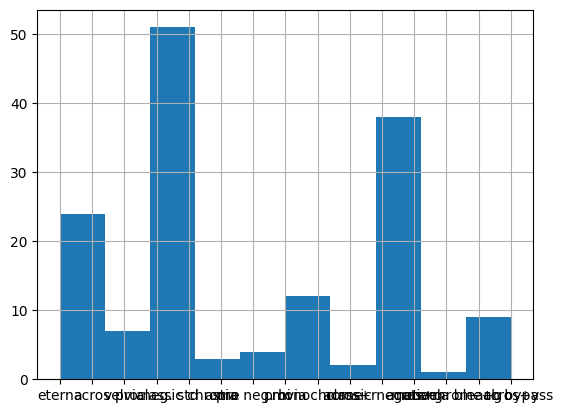

In [306]:
print(df.simulation.unique())
df.simulation.hist()


# sharpness

[-4.0, -3.0, -2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0]


<AxesSubplot: >

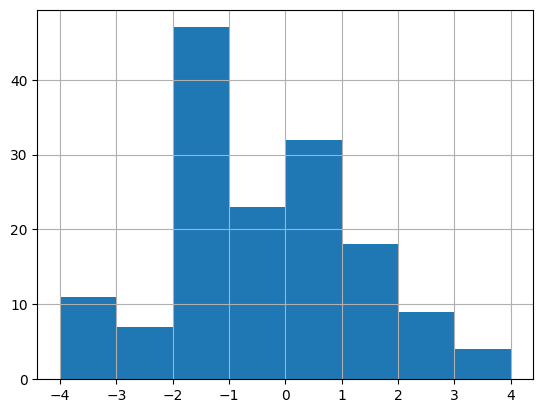

In [307]:
df.sharpness.fillna(df.sharpening, inplace=True)
df.sharpness.fillna(0, inplace=True)
df.drop(columns=["sharpening"], inplace=True)
print(sorted(df.sharpness.unique()))
df.sharpness.hist(bins=np.arange(-4, 5))


# clarity

[-5.0, -4.0, -3.0, -2.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0]


<AxesSubplot: >

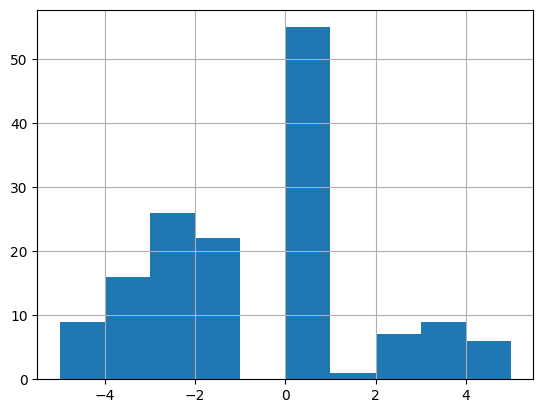

In [308]:
df.clarity.fillna(0, inplace=True)
print(sorted(df.clarity.unique()))
df.clarity.hist(bins=np.arange(-5, 6))


# noise reduction

[-4, -2, 2]


<AxesSubplot: >

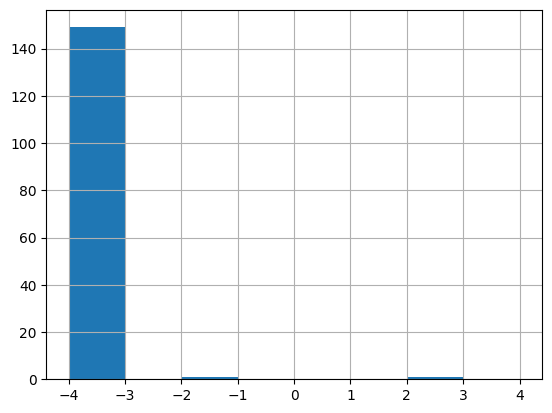

In [309]:
df["noise reduction"].fillna(0, inplace=True)
print(sorted(df["noise reduction"].unique()))
df["noise reduction"].hist(bins=np.arange(-4, 5))


# shadow

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 4.0]


<AxesSubplot: >

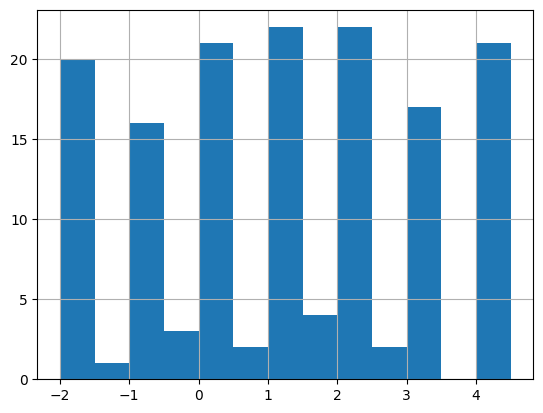

In [310]:
df.shadow.fillna(0, inplace=True)
print(sorted(df.shadow.unique()))
df.shadow.hist(bins=np.arange(-2, 5, 0.5))


# highlight

[-2.0, -1.5, -1.0, -0.5, 0.0, 0.5, 1.0, 2.0, 3.0, 3.5, 4.0]


<AxesSubplot: >

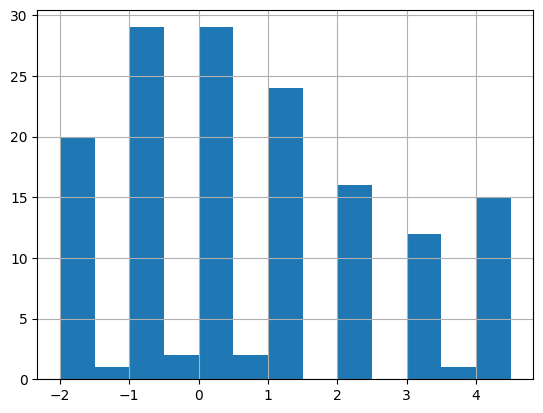

In [311]:
df.highlight.fillna(0, inplace=True)
print(sorted(df.highlight.unique()))
df.highlight.hist(bins=np.arange(-2, 5, 0.5))


# 

# color chrome effect blue

['off', 'strong', 'weak']


<AxesSubplot: >

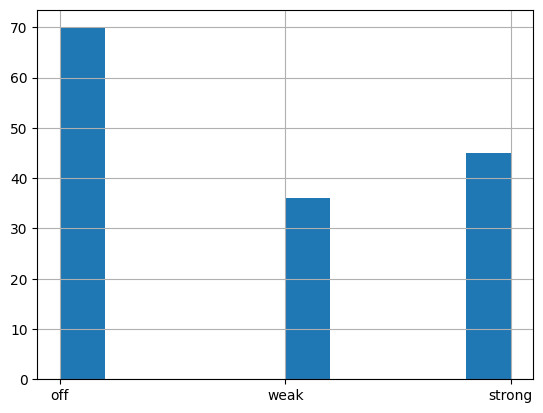

In [312]:
df["color chrome effect blue"].fillna("off", inplace=True)
print(sorted(df["color chrome effect blue"].unique()))
df["color chrome effect blue"].hist()


# color chrome effect

['weak' 'strong' 'off']


<AxesSubplot: >

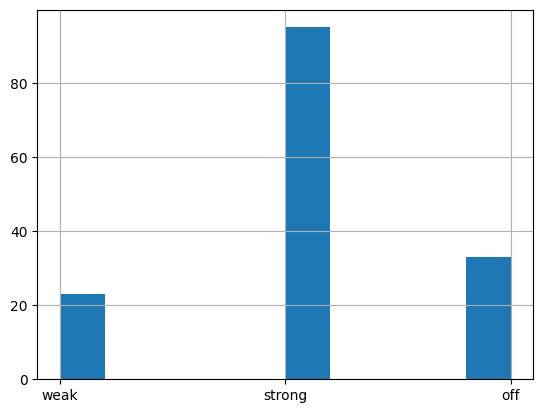

In [313]:
df["color chrome effect"].fillna("off", inplace=True)
df["color chrome effect"] = df["color chrome effect"].str.extract("(weak|strong|off)")
print(df["color chrome effect"].unique())
df["color chrome effect"].hist()


# grain effect

In [314]:
df["grain effect"].fillna("off", inplace=True)
print(sorted(df["grain effect"].unique()))


['off', 'strong', 'strong, large', 'strong, small', 'weak', 'weak, large', 'weak, small']


['off', 'strong', 'weak']


<AxesSubplot: >

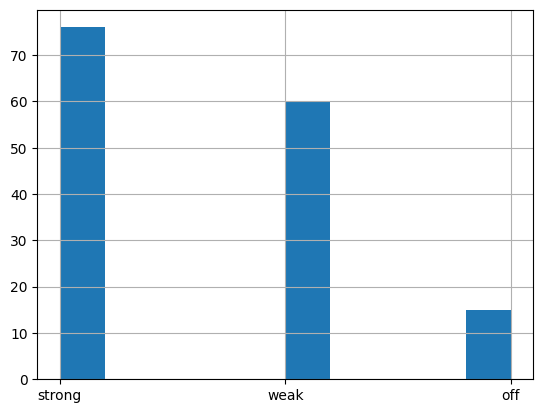

In [315]:
df["grain strength"] = df["grain effect"].str.extract("(weak|strong|off)")
print(sorted(df["grain strength"].unique()))
df["grain strength"].hist()


['large', 'off', 'small', 'small or large']


<AxesSubplot: >

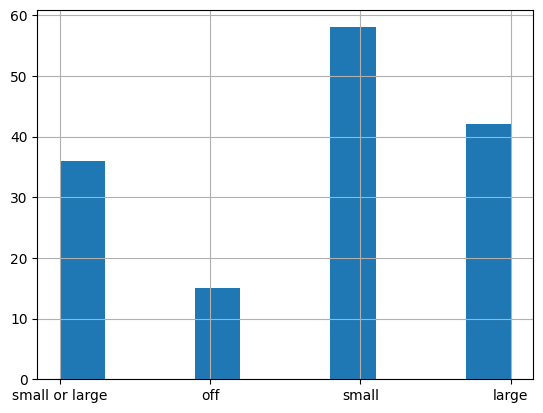

In [316]:
df["grain size"] = df["grain effect"].str.extract("(small|large|off)")
df["grain size"].fillna("small or large", inplace=True)
print(sorted(df["grain size"].unique()))
df["grain size"].hist()


# exposure compensation

In [317]:
df["exposure compensation"].fillna("0", inplace=True)
df.loc[df["exposure compensation"] == "", ["exposure compensation"]] = "0"
df["exposure compensation"] = df["exposure compensation"].str.replace(
    " (typically)", "", regex=False
)
print(sorted(df["exposure compensation"].unique()))


['+1 2/3 to +2 1/3', '+1 to +1 2/3', '+1 to +1 2/3, but try between +1/3 to +2 2/3', '+1 to +2', '+1/3', '+1/3 to +1', '+1/3 to +1 (main exposure), 0 to -2 (second exposure)', '+1/3 to +2/3', '+2/3 to + 1-1/3', '+2/3 to +1', '+2/3 to +1 1/3', '+2/3 to +1 1/3 for the 1st exposure, 0 to +1/3 for the 2nd exposure', '+2/3 to +1-1/3', '-1 to 0', '-1/3 to +1/3', '-1/3 to +2/3', '-1/3 to -1', '-1/3 to -2/3', '-2/3 to +1', '-2/3 to +2/3', '-2/3 to -1 1/3', '0', '0 to +1', '0 to +1/3', '0 to +2/3', '0 to -1', '0 to -2/3']


# dynamic range

dr100
dr400
dr-auto
dr200
d-range priority auto
d-range priority strong


<AxesSubplot: >

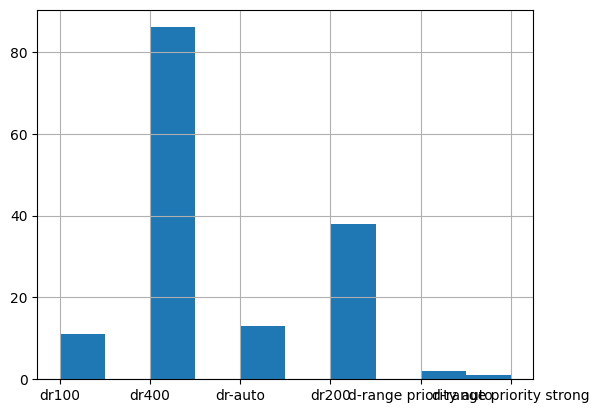

In [318]:
df.loc[df["dynamic range"] == "n/a", ["dynamic range"]] = "dr-auto"
df.loc[df["dynamic range"] == "", ["dynamic range"]] = "dr-auto"
df["dynamic range"].fillna("dr-auto", inplace=True)
df["dynamic range"] = df["dynamic range"].str.replace(
    "dr400 (dr200 in low contrast situations)", "dr400", regex=False
)
print(*df["dynamic range"].unique(), sep="\n")
df["dynamic range"].hist()


# iso

In [319]:
iso_map = {
    "auto up to iso 6400": "160 to 6400",
    "auto up to iso 12800": "160 to 12800",
    "25600 or 51200": "25600 to 51200",
    "nan": "160 to 6400",
    "auto, up to iso 6400": "160 to 6400",
    "auto, up to iso 3200": "160 to 3200",
    "auto, iso 3200 to iso 12800": "3200 to 12800",
    "auto, up to iso 12800": "160 to 12800",
    "3200 – 6400": "3200 to 6400",
    "iso 1600 – 12800": "1600 to 12800",
    "1600 to 6400": "1600 to 6400",
    "up to iso 5000": "160 to 6400",
    "auto, up to iso 1600": "160 to 1600",
    "auto, up to iso 6400 (for best results, try to limit the iso to 1600 and lower when able)": "160 to 6400",
    "3200": "3200 to 3200",
    "12800": "12800 to 12800",
}

df.iso = df.iso.replace(iso_map)
df.iso.fillna("160 to 6400", inplace=True)
print(*sorted(df["iso"].unique()), sep="\n")


12800 to 12800
160 to 12800
160 to 1600
160 to 3200
160 to 6400
1600 to 12800
1600 to 6400
25600 to 51200
3200 to 12800
3200 to 3200
3200 to 6400


# white balance

In [320]:
df["white balance"].fillna("auto, 0 red & 0 blue", inplace=True)
wb_map_comma = {
    "auto (use a shift on the second exposure)": "auto, 0 red & 0 blue",
    "auto": "auto, 0 red & 0 blue",
    "auto white priority": "auto white priority, 0 red & 0 blue",
}
df["white balance"] = df["white balance"].replace(wb_map_comma)
print(*df["white balance"].unique(), sep="\n")


auto, +5 red & -6 blue
auto, 0 red & 0 blue
auto, +1 red & -1 blue
auto, +5 red & +5 blue
3200k, +8 red & -8 blue
10000k, +9 red & 0 blue
6300k, -1 red & -4 blue
daylight, +2 red & -5 blue
5900k, -3 red & +3 blue
4300k, -1 red & -3 blue
auto, -2 red & -4 blue
8300k, +4 red & +8 blue
daylight fluorescent (1), -2 red & +4 blue
cloudy/shade, -3 red & +7 blue
warm-white fluorescent (2), -1 red & -3 blue
auto, +2 red & +2 blue
daylight, -3 red & +1 blue
awb, 0 red & +9 blue
daylight, -2 red & +3 blue
2650k, -1 red & +4 blue
7700k, -8 red & -3 blue
daylight, +4 red & -5 blue
auto, +5 red & -5 blue
shade, +4 red & +6 blue
6300k, +6 red & +3 blue
fluorescent 1 (daylight fluorescent), -3 red & -1 blue
auto, +4 red & -4 blue
4550k, +1 red & -9 blue
daylight, 0 red & -1 blue
daylight, +3 red & -5 blue
daylight,+9 red & -9 blue
daylight, 0 red & 0 blue
daylight, +3 red & +1 blue
daylight, -1 red & +1 blue
daylight, -1 red & -3 blue
auto, +1 red & -5 blue
6050k, +3 red & 0 blue
2750k, -5 red & +9 b

In [321]:
df["wb"] = df["white balance"].str.split(",").str[0]
wb_map_clean = {
    "awb": "auto",
    "cloudy/shade": "shade",
    "daylight fluorescent (1)": "fluorescent 1",
    "fluorescent 1 (daylight fluorescent)": "fluorescent 1",
    "fluorescent 3 (cool white fluorescent)": "fluorescent 3",
    "fluorescent 3 (“cool white fluorescent”)": "fluorescent 3",
    "warm-white fluorescent (2)": "fluorescent 2",
}
df.wb = df.wb.replace(wb_map_clean)
print(sorted(df.wb.unique()), sep="\n")


['10000k', '2500k', '2650k', '2750k', '2900k', '2950k', '3200k', '4300k', '4550k', '4700k', '4800k', '4900k', '5000k', '5100k', '5200k', '5250k', '5300k', '5500k', '5600k', '5800k', '5900k', '6050k', '6300k', '6700k', '6800k', '6900k', '6990k', '7000k', '7100k', '7300k', '7350k', '7700k', '8300k', '8700k', '9100k', 'auto', 'auto ambience priority', 'auto white priority', 'daylight', 'fluorescent 1', 'fluorescent 2', 'fluorescent 3', 'incandescent', 'shade']


In [322]:
df["wb shift red"] = df["white balance"].str.extract("(-?\+?\d)\s+red", expand=True)
df["wb shift blue"] = df["white balance"].str.extract("(-?\+?\d)\s+blue", expand=True)
print(sorted(df["wb shift red"].unique()), sep="\n")
print(sorted(df["wb shift blue"].unique()), sep="\n")


['+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8', '+9', '-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '0']
['+1', '+2', '+3', '+4', '+5', '+6', '+7', '+8', '+9', '-0', '-1', '-2', '-3', '-4', '-5', '-6', '-7', '-8', '-9', '0']


# toning

In [323]:
df["toning"].fillna("0", inplace=True)
toning_map = {
    "+1 (warm)": "+1",
    "0 (off)": "0",
    "0 (neutral)": "0",
    "wc +2 mg 0": "wc +2, mg 0",
}
df["toning"] = df["toning"].replace(toning_map)
print(*df["toning"].unique(), sep="\n")


0
+1
-9
wc +2, mg 0
wc +1, mg 0


# color

[-4, -3, -2, -1, 0, 1, 2, 3, 4]


<AxesSubplot: >

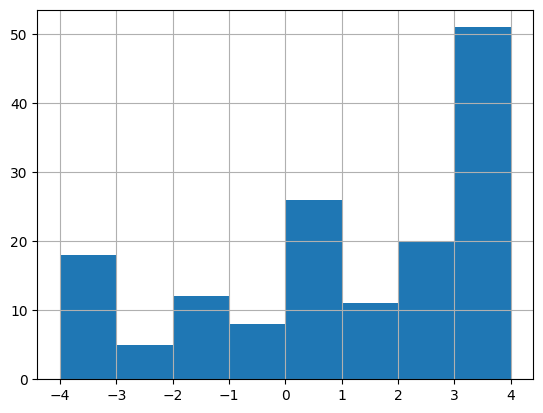

In [324]:
df.color.fillna(0, inplace=True)
df.color = df.color.astype("int")
print(sorted(df.color.unique()))
df.color.hist(bins=np.arange(-4, 5))


# export

In [325]:
df_output = df[
    [
        "date",
        "name",
        "simulation",
        "toning",
        "grain strength",
        "grain size",
        "color chrome effect",
        "color chrome effect blue",
        "wb",
        "wb shift red",
        "wb shift blue",
        "dynamic range",
        "highlight",
        "shadow",
        "color",
        "sharpness",
        "noise reduction",
        "clarity",
        "iso",
        "exposure compensation",
        "link",
    ]
]
df_output.sort_values(by="date", ascending=False, inplace=True)
df_output.to_csv(PATH_RECIPES_CSV, index=False)


C:\Users\Max\AppData\Local\Temp\ipykernel_5936\1130465582.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_output.sort_values(by="date", ascending=False, inplace=True)
